In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from regressors import stats

In [2]:
df = pd.read_csv('petrol_consumption.csv')

In [3]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
data = df.copy()

In [5]:
data.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [7]:
 data.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


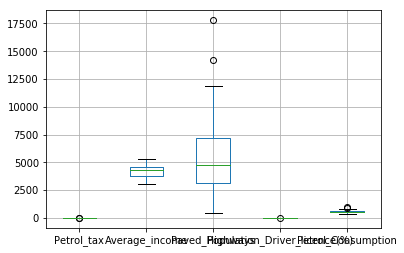

In [8]:
data.boxplot()

In [9]:
data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [11]:
X = data[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = data['Petrol_Consumption']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
y_predict = regressor.predict(X_test)

In [15]:
regressor.score(X_train,y_train)

0.7208154295817701

In [17]:
regressor.coef_

array([-4.00166602e+01, -6.54126674e-02, -4.74073380e-03,  1.34186212e+03])

In [18]:

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [19]:
coeff_df=pd.DataFrame(regressor.coef_)
coeff_df

,0
0,-40.016660
1,-0.065413
2,-0.004741
3,1341.862121


In [21]:
regressor.intercept_

425.59933220324297

In [22]:
RSS = (((y_predict-y_test)**2).sum())
RSS

46663.44787588363

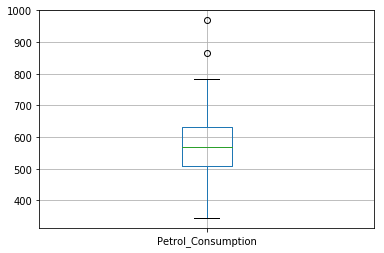

In [23]:
data.boxplot('Petrol_Consumption')

In [24]:
import statsmodels.api as sm

In [25]:
model = sm.OLS(y,X).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     867.8
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.17e-41
Time:                        12:35:54   Log-Likelihood:                -269.00
No. Observations:                  48   AIC:                             546.0
Df Residuals:                      44   BIC:                             553.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                     -14.2390      8.414     -1.692      0.098     -31.196       2.718
Average_income                  -0.0594      0.017     -3.404      0.001      -0.095      -0.024
Paved_Highways                   0.0012      0.003      0.404      0.688      -0.005       0.007
Population_Driver_licence(%)  1630.8913    130.969     12.452      0.000    1366.941    1894.842
==============================================================================
Omnibus:                        9.750   Durbin-Watson:                   2.226
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.310
Skew:                           0.880   Prob(JB):                      0.00952
Kurtosis:                       4.247   Cond. No.                     1.00e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X = sm.add_constant(X)

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
model = sm.OLS(y,X).fit()

In [29]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     22.71
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.91e-10
Time:                        12:37:09   Log-Likelihood:                -266.79
No. Observations:                  48   AIC:                             543.6
Df Residuals:                      43   BIC:                             552.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          377.2911    185.541      2.033      0.048       3.112     751.471
Petrol_tax                     -34.7901     12.970     -2.682      0.010     -60.947      -8.633
Average_income                  -0.0666      0.017     -3.867      0.000      -0.101      -0.032
Paved_Highways                  -0.0024      0.003     -0.716      0.478      -0.009       0.004
Population_Driver_licence(%)  1336.4494    192.298      6.950      0.000     948.643    1724.256
==============================================================================
Omnibus:                       15.040   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.510
Skew:                           1.056   Prob(JB):                     5.80e-05
Kurtosis:                       5.300   Cond. No.                     1.98e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
features_name = list(['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)'])
features_name

['Petrol_tax',
 'Average_income',
 'Paved_Highways',
 'Population_Driver_licence(%)']

In [31]:
stats.summary(regressor,X_train,y_train,features_name)

Residuals:
      Min        1Q    Median        3Q       Max
 306.4529  527.6086  583.9262  642.0048  780.4633


Coefficients:
                                 Estimate  Std. Error  t value   p value
_intercept                     425.599332  169.782506   2.5067  0.016707
Petrol_tax                     -40.016660    8.646837  -4.6279  0.000044
Average_income                  -0.065413    0.004016 -16.2872  0.000000
Paved_Highways                  -0.004741    0.002196  -2.1585  0.037451
Population_Driver_licence(%)  1341.862121  177.426574   7.5629  0.000000
---
R-squared:  0.72082,    Adjusted R-squared:  0.68697
F-statistic: 21.30 on 4 features


In [32]:
def remove_outlier(df_in,col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    lowest_point = q1-1.5*iqr
    highest_point = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lowest_point) & (df_in[col_name] < highest_point)]
    return df_out

In [33]:
data.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [34]:
data_outlier = remove_outlier(data,'Petrol_Consumption')

In [35]:
data_outlier = remove_outlier(data_outlier,'Petrol_tax')
data_outlier = remove_outlier(data_outlier,'Average_income')
data_outlier = remove_outlier(data_outlier,'Paved_Highways')
data_outlier = remove_outlier(data_outlier,'Population_Driver_licence(%)')

In [36]:
data_outlier.shape

(43, 5)

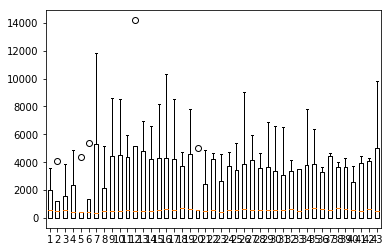

In [37]:
plt.boxplot(data_outlier)
plt.show()

In [38]:
data2 = data_outlier

In [39]:
data2.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.090934,-0.489964,-0.263974,-0.422414
Average_income,0.090934,1.000000,0.131251,0.023500,-0.575419
Paved_Highways,-0.489964,0.131251,1.000000,-0.037168,0.054160
Population_Driver_licence(%),-0.263974,0.023500,-0.037168,1.000000,0.534119
Petrol_Consumption,-0.422414,-0.575419,0.054160,0.534119,1.000000


In [40]:
X = data2[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y = data2['Petrol_Consumption']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:

coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['coefficient'])
coeff_df


,coefficient
Petrol_tax,-21.819916
Average_income,-0.081717
Paved_Highways,-0.000755
Population_Driver_licence(%),944.999787


In [44]:
y_pred = regressor.predict(X_test)

In [45]:
regressor.coef_

array([-2.18199161e+01, -8.17166582e-02, -7.54966834e-04,  9.44999787e+02])

In [46]:
regressor.intercept_

542.0444061959802

In [47]:
((y_pred - y_test)**2).sum()

33598.26924425497

In [48]:
regressor.score(X_train,y_train)

0.7499721185220141

In [49]:
stats.summary(regressor,X_train,y_train,features_name)

Residuals:
      Min        1Q   Median        3Q       Max
 350.0691  519.5717  552.437  598.8199  683.5982


Coefficients:
                                Estimate  Std. Error  t value   p value
_intercept                    542.044406  126.947405   4.2698  0.000155
Petrol_tax                    -21.819916    6.438853  -3.3888  0.001833
Average_income                 -0.081717    0.002987 -27.3554  0.000000
Paved_Highways                 -0.000755    0.001938  -0.3896  0.699339
Population_Driver_licence(%)  944.999787  145.142814   6.5108  0.000000
---
R-squared:  0.74997,    Adjusted R-squared:  0.71549
F-statistic: 21.75 on 4 features


In [50]:
model = sm.OLS(y,X).fit()

In [51]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1122.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           1.12e-39
Time:                        12:44:29   Log-Likelihood:                -230.84
No. Observations:                  43   AIC:                             469.7
Df Residuals:                      39   BIC:                             476.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Petrol_tax                       6.4884      8.353      0.777      0.442     -10.408      23.385
Average_income                  -0.0724      0.015     -4.926      0.000      -0.102      -0.043
Paved_Highways                   0.0055      0.003      1.892      0.066      -0.000       0.011
Population_Driver_licence(%)  1387.8569    120.310     11.536      0.000    1144.507    1631.206
==============================================================================
Omnibus:                        8.696   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                7.670
Skew:                           0.903   Prob(JB):                       0.0216
Kurtosis:                       4.008   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
X = sm.add_constant(X)

C:\Users\sony\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [53]:
model = sm.OLS(y,X).fit()

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     20.84
Date:                Sat, 28 Mar 2020   Prob (F-statistic):           3.69e-09
Time:                        12:44:32   Log-Likelihood:                -224.72
No. Observations:                  43   AIC:                             459.4
Df Residuals:                      38   BIC:                             468.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          550.5681    155.725      3.536      0.001     235.320     865.816
Petrol_tax                     -21.2266     10.740     -1.976      0.055     -42.968       0.515
Average_income                  -0.0801      0.013     -6.116      0.000      -0.107      -0.054
Paved_Highways                   0.0010      0.003      0.355      0.724      -0.005       0.007
Population_Driver_licence(%)   892.5077    175.522      5.085      0.000     537.181    1247.834
==============================================================================
Omnibus:                        1.901   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                1.069
Skew:                           0.348   Prob(JB):                        0.586
Kurtosis:                       3.333   Cond. No.                     2.23e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""